In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = (224, 224)
batch_size = 32
epochs = 100

In [ ]:
data_dir = '/content/drive/MyDrive/raw'

In [ ]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

In [ ]:
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use subset='validation' for validation data
)

Found 2522 images belonging to 4 classes.


In [ ]:
!pip install tensorflow

# Import the preprocess_input function
from tensorflow.keras.applications.vgg19 import preprocess_input

In [ ]:
# Data preprocessing and augmentation
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% of data for validation
)

In [ ]:
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use subset='training' for training data
)

Found 10092 images belonging to 2 classes.


In [ ]:
validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use subset='validation' for validation data
)

Found 2522 images belonging to 2 classes.


In [ ]:
# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout after the second convolutional layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {test_loss}")
print(f"Validation Accuracy: {test_accuracy}")

# Save the trained model
model.save('face_liveness_detection_model_NUAA__CNN.h5')

Epoch 1/100
315/315 [==============================] - 2948s 9s/step - loss: 15.9534 - accuracy: 0.6579 - val_loss: 0.3725 - val_accuracy: 0.9083
Epoch 2/100
315/315 [==============================] - 205s 651ms/step - loss: 0.4827 - accuracy: 0.7035 - val_loss: 0.3417 - val_accuracy: 0.9267
Epoch 3/100
315/315 [==============================] - 206s 652ms/step - loss: 0.4757 - accuracy: 0.7079 - val_loss: 0.3392 - val_accuracy: 0.9263
Epoch 4/100
315/315 [==============================] - 203s 645ms/step - loss: 0.4475 - accuracy: 0.7427 - val_loss: 0.4351 - val_accuracy: 0.9054
Epoch 5/100
315/315 [==============================] - 203s 645ms/step - loss: 0.3500 - accuracy: 0.8429 - val_loss: 0.5339 - val_accuracy: 0.8938
Epoch 6/100
315/315 [==============================] - 203s 645ms/step - loss: 0.3356 - accuracy: 0.8465 - val_loss: 0.3218 - val_accuracy: 0.9347
Epoch 7/100
315/315 [==============================] - 203s 645ms/step - loss: 0.3226 - accuracy: 0.8541 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_json = model.to_json()
with open("face_liveness_detection_model_cnnNu.json", "w") as json_file:
    json_file.write(model_json)

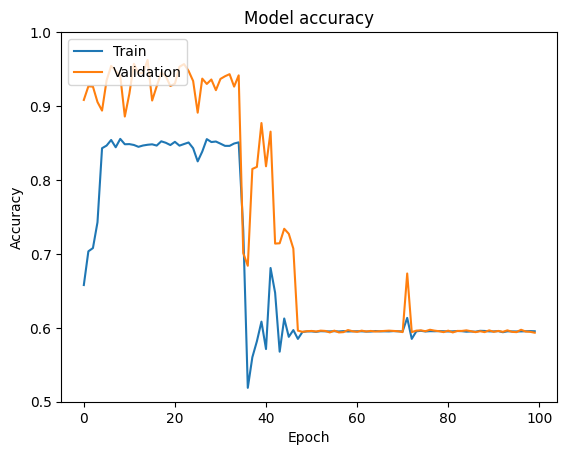

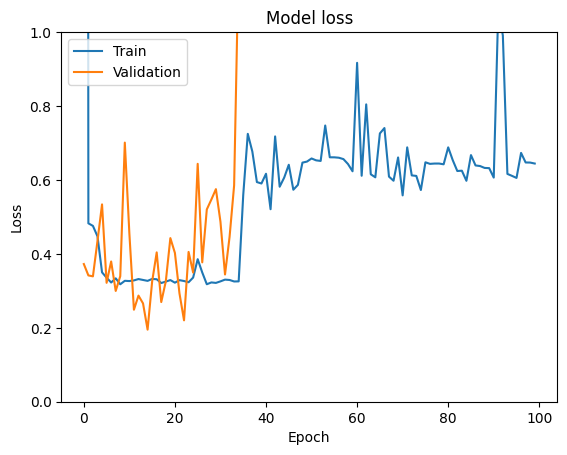

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.5, 1)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0.0, 1)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming you have 'history' object from model training
plot_training_history(history)

79/79 [==============================] - 584s 7s/step


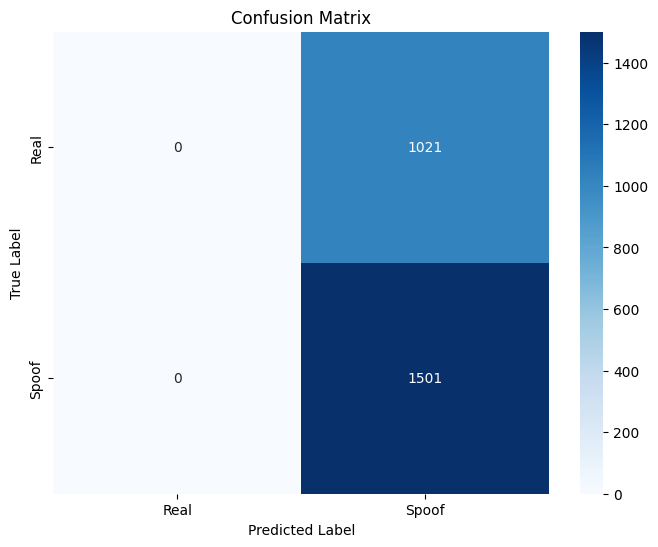

Accuracy: 0.60
Precision: 0.60
Recall: 1.00
F1-score: 0.75


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Load the saved model
model = load_model('/content/drive/MyDrive/face_liveness_detection_model_NUAA__CNN.h5')

# True classes
y_true = test_generator.classes

# Predicted classes
y_pred = model.predict(test_generator) > 0.5

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
labels = ['Real', 'Spoof']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
precision = true_positives / (true_positives + false_positives)
print(f'Precision: {precision:.2f}')

# Calculate recall
false_negatives = conf_matrix[1, 0]
recall = true_positives / (true_positives + false_negatives)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1_score:.2f}')
